In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [67]:
df_er = pd.read_excel ('Data_COMP5212project.xlsx', sheet_name='ER')
print (df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [68]:
df_er['datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [69]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [70]:
df_er=df_er.drop(columns='Date')

In [71]:
df_var = pd.read_excel ('Data_COMP5212project.xlsx', sheet_name='Variables')

In [72]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,...,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,...,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,...,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,...,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,...,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,...,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068


In [73]:
df_var['datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,...,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,...,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,...,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,...,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,...,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,...,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1999-05-01


In [74]:
df_var=df_var.drop(columns='Date')

In [75]:
df_all=df_er.set_index('datetime',drop=False).join(df_var.set_index('datetime'))

In [76]:
df_all.head()

,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,datetime,Shanghai,SP500,...,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01,1134.67,1279.64,...,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868
1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01,1090.09,1238.33,...,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319
1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01,1158.05,1286.37,...,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554
1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01,1120.93,1335.18,...,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920
1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01,1279.33,1301.84,...,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068


In [96]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19']]#, 'DLTINT_USEA']]

In [97]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19
datetime,,,,,,,,,,,
1999-01-01,1.1366,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220
1999-02-01,1.1025,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742
1999-03-01,1.0770,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810
1999-04-01,1.0570,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407
1999-05-01,1.0423,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049


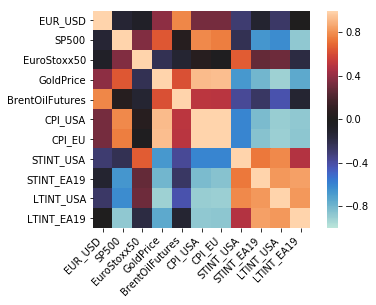

In [90]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Mean Absolute Error: 0.03 degrees.
MAE: 0.03300247161753589
MSE: 0.0018271913836743162
RMSE: 0.04274565923780234
R-squared:  0.8684555066914231
Accuracy: 97.43 %.


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Predictions')

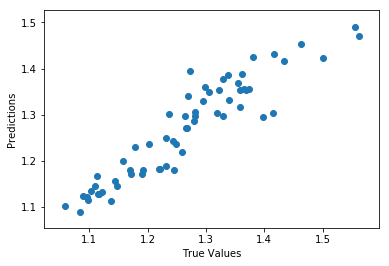

In [120]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = regressor.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [92]:
import xgboost as xgb

Mean Absolute Error: 0.02 degrees.
MAE: 0.022687686248052688
MSE: 0.001101546345187688
RMSE: 0.03318955174731482
R-squared:  0.9211954286477937
Accuracy: 98.23 %.


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Predictions')

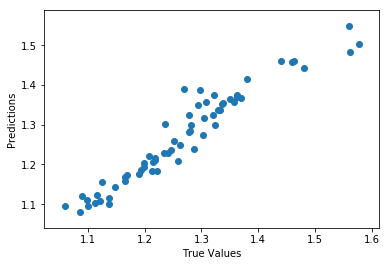

In [35]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3)

xgb_reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [124]:
import random
import time

def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

#df_usdeutune = df_usdeu.iloc[:int(0.7*len(df_usdeu)),:]

#usdeu_ytune=df_usdeutune['EUR_USD']
#usdeu_xtune=df_usdeutune.drop('EUR_USD', axis=1)

#usdeu_ytune = usdeu_y.iloc[:int(0.7*len(df_usdeutune))]
#usdeu_xtune = usdeu_x.iloc[:,:int(0.7*len(df_usdeutune))]

#X_train, X_test, y_train, y_test = train_test_split(usdeu_xtune, usdeu_ytune, test_size=0.3, random_state=0)

df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3)
usdeu_x_train0, usdeu_x_val, usdeu_y_train0, usdeu_y_val = train_test_split(usdeu_x_train, usdeu_y_train, test_size = 0.3)

start0 = time.time()
best_mape = 100
best_params = {'min_child_weight': None, 'n_estimators': None}
while time.time() - start0 < 30:
    #for n in range(3):
    start1 = time.time()
    mc = random.randint(3,8)
    gm = random.randint(1000,2000)
    xgbr = xgb.XGBRegressor(min_child_weight=mc,n_estimators=gm) 
    xgbr.fit(usdeu_x_train0, usdeu_y_train0)
    p_train=xgbr.predict(usdeu_x_train0)
    p_val=xgbr.predict(usdeu_x_val)
    mape = MAPError(p_val, usdeu_y_val) #for pt
    if mape < best_mape:
        best_mape = mape
        best_params['max_depth'] = mc
        best_params['n_estimators'] = gm
print(mc,gm,mape)
print(best_params) 
print(time.time() - start1) 
print("MAPE: {:.3f}".format(MAPError(p_val, usdeu_y_val)))
print(time.time() - start0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5 1038 2.9357864864029115
{'min_child_weight': None, 'n_estimators': 1498, 'max_depth': 8}
0.0967414379119873
MAPE: 2.936
30.061694622039795


Mean Absolute Error: 0.03 degrees.
MAE: 0.02880029653216164
MSE: 0.0012315603474100534
RMSE: 0.035093594107900285
R-squared:  0.9220844640175664
Accuracy: 97.68 %.


Text(0, 0.5, 'Predictions')

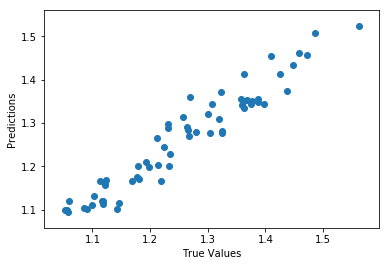

In [126]:
xgb_reg = xgb.XGBRegressor(n_estimators=1500, max_depth=8)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")